In [1]:
import pandas as pd

In [2]:
image_level_statistics = pd.read_csv('./results/data_analysis/image_level_statistics.csv')

Sample image path from images without boxes

In [3]:
image_level_statistics.head()

,Unnamed: 0,img_name,WnID,bboxes,sample,pixel_w,pixel_h,Species,box_coords,n_boxes
0,0,n01664674_349,n01664674,False,train,130,87,Pacific Ridley,NaN,NaN
1,1,n01664674_427,n01664674,False,train,952,549,Pacific Ridley,NaN,NaN
2,2,n01664674_824,n01664674,False,train,444,283,Pacific Ridley,NaN,NaN
3,3,n01664674_1322,n01664674,False,train,450,599,Pacific Ridley,NaN,NaN
4,4,n01664674_1847,n01664674,False,train,350,159,Pacific Ridley,NaN,NaN


# Draw and plot samples

In [4]:
seed = 9182017
def sample_images(df):
    #find species without bboxes
    species_boxes = df.loc[df.bboxes, 'Species'].unique()
    df_no_boxes = df[~df.Species.isin(species_boxes)]
    df_boxes = df[df.bboxes]
    sample = list()
    for species in df.Species.unique():
        if species not in species_boxes:
            sample.append(df[df.Species == species].sample(
                n=1, random_state=seed))
        else:
            sample.append(df_boxes.loc[df_boxes.Species == species].sample(
                n=1, random_state=seed))
    sample = pd.concat(sample)
    return sample

In [5]:
samples = sample_images(image_level_statistics)

In [6]:
samples

,Unnamed: 0,img_name,WnID,bboxes,sample,pixel_w,pixel_h,Species,box_coords,n_boxes
468,468,n01664674_2066,n01664674,False,val,220,186,Pacific Ridley,NaN,NaN
1570,1570,n01665541_2210,n01665541,True,train,500,333,Leatherback Turtle,"[['221', '152', '302', '187']]",1.0
2385,2385,n01664065_15532,n01664065,True,train,500,374,Loggerhead,"[['5', '15', '415', '373']]",1.0
3888,3888,n01668665_6472,n01668665,False,test,500,375,Slider,NaN,NaN
5660,5660,n01666228_7810,n01666228,False,val,500,339,Common Snapping Turtle,NaN,NaN
6035,6035,n01664492_4353,n01664492,False,train,576,480,Atlantic Ridley,NaN,NaN
7650,7650,n01670802_1962,n01670802,False,train,232,154,Giant Tortoise,NaN,NaN
8094,8094,n01672611_2739,n01672611,False,train,360,216,Smooth Softshell,NaN,NaN
8190,8190,n01672432_2108,n01672432,False,val,295,222,Spiny Softshell,NaN,NaN
8792,8792,n01670535_5888,n01670535,False,train,180,136,European Tortoise,NaN,NaN


We did not draw a sample with more than one box.

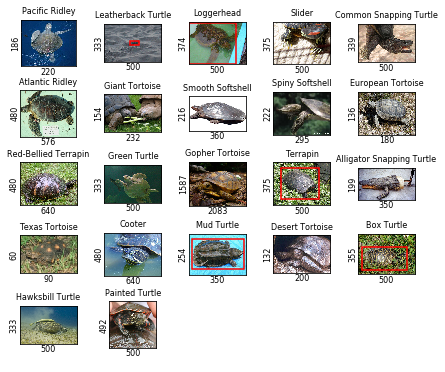

In [7]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(6,5))
for i, row in enumerate(samples.iterrows()):
    row = row[1] #get rid of the index
    img_path = os.path.join('./data/images/', row['sample'], 
                            row['WnID'], row['img_name'] + '.JPEG')
    im = Image.open(img_path)
    ax.flatten()[i].imshow(im)
    #ax.flatten()[i].set_xlim(0,row['res_w'])
    #ax.flatten()[i].set_ylim(0,row['res_h'])
    ax.flatten()[i].set_xticks([])
    ax.flatten()[i].set_yticks([])
    ax.flatten()[i].set_xlabel(row.pixel_w, fontsize=8, labelpad=1)
    ax.flatten()[i].set_ylabel(row.pixel_h, fontsize=8, labelpad=1)
    ax.flatten()[i].set_title(row.Species, fontsize=8)
    if row.bboxes:
        box = row['box_coords']
        # this is slightly ugly
        box = [int(coord.strip(' \"\'[]')) for coord in box.split(',')]
        rect = patches.Rectangle((box[0], box[1]),
                                 box[2]-box[0], 
                                 box[3]-box[1],linewidth=1.5,edgecolor='r',facecolor='none')
        ax.flatten()[i].add_patch(rect)


for ax in ax.flatten()[-3:]:
    ax.axis('off')
fig.tight_layout(pad=0.1)
fig.savefig('./results/data_analysis/figures/sample.png', dpi=300)